# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

The rapid advancement of technology has greatly streamlined our daily activities, yet it has also made our lives busier and more distracted. This shift has affected our interaction with art and entertainment, making it challenging to discover and engage with new content. In this digital age, the ability to quickly find content that resonates with our personal tastes is more valuable than ever.

Internet-based platforms, particularly in the entertainment sector, thrive on the time users spend engaged with their content. A prime example is Spotify, a leading audio streaming service with a vast global presence. Spotify has mastered the art of music discovery through its advanced recommendation systems, which utilize a vast database of user preferences to suggest the 'next best song.' This approach not only enhances user experience by making music discovery seamless but also contributes to the platform's success by encouraging longer engagement times.

In the face of an ever-growing online music library, the challenge for Spotify and similar platforms is to efficiently guide users to content that matches their tastes, thus ensuring sustained engagement and satisfaction. The development and refinement of recommendation algorithms are central to this effort, highlighting the critical role of data science in shaping the future of digital entertainment.

### **The objective:**

The main aim is to leverage the extensive collection of music available to improve the user's experience by seamlessly directing them to new songs that match their individual tastes. This objective seeks not only to boost user engagement and satisfaction but also to encourage users to spend more time on the platform, thereby strengthening the bond between listeners and the music they enjoy.

### **The key questions:**

- How does the number of song plays correlate with user engagement, and at what point does a song become a significant part of a user's playlist?
- Can we identify specific trends in song preferences across different generations, and how do these preferences influence the discovery of new music?
- When users prefer a cover version of a song, does this indicate a preference for the artist's style over the original song's composition, and how does this preference affect song recommendations?
- What is the likelihood that enjoying one song from an album indicates a predisposition to like other songs from the same album, and how can we leverage this to enhance music discovery?
- Given our objective to maximize user session length and satisfaction, how do we balance the importance of recall and precision in our recommendation system to optimize the user experience?

### **The problem formulation**:

As Data Science professionals working on our music streaming platform, we are tasked with leveraging advanced analytics to significantly enhance the user experience, encouraging them to spend more time engaged with our service. Our primary objective is to craft a state-of-the-art recommendation system. This system is designed to offer personalized and highly relevant music suggestions, drawing from a deep analysis of user listening habits, musical preferences, and interactions within the platform.

To tackle this challenge from various perspectives, we will employ a diverse set of sophisticated recommendation models, including similarity-based collaborative filtering, matrix factorization techniques, clustering-based systems, and content-based recommendations. This multifaceted approach ensures that every user receives tailor-made recommendations that not only align with their existing musical tastes but also help them discover new songs and artists that they're likely to enjoy.

Given the company's ambition to maximize the time users spend on the platform, prioritizing recall becomes essential. By focusing on recall, we ensure the recommendation system covers a broad spectrum of relevant musical options, thus enhancing the potential for user discovery and sustained engagement with the platform. Nonetheless, it's crucial to strike a careful balance with precision to maintain the relevance of these recommendations. Achieving this equilibrium is key to delivering an optimal user experience that fosters user retention while boosting satisfaction and loyalty to our platform.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

# Milestone Submission

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd


# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Curso_MIT/Capstone Project/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Curso_MIT/Capstone Project/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
- The first dataset, count_df, encompasses 2 million records detailing the number of times users have listened to songs. Each entry serves as a testament to the relationship between our users and the music we offer, highlighting the absence of null values and ensuring the quality of our interaction data.

- The second dataset, song_df, provides a comprehensive look into our collection of 1 million songs. Although largely complete, we note the absence of names for 15 songs and 5 album names. These omissions, though minor in proportion to the dataset's size, will be subject to detailed evaluation to decide on their retention or removal. The relevance of these songs to our users will be particularly considered, determining if their absence could significantly impact the user experience or the performance of the recommendation model.


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = count_df.merge(song_df.drop_duplicates(), how = "left", on = "song_id")
# Drop the column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis = 1)
## Name the obtained dataframe as "df"
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
2054529,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
2054530,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2054531,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2054532,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

columns_encoded = df[['user_id','song_id']].apply(LabelEncoder().fit_transform)
df['user_id'] = columns_encoded['user_id']
df['song_id'] = columns_encoded['song_id']
df

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
2054529,64590,3660,2,Ignorance (Album Version),Ignorance,Paramore,0
2054530,64590,3736,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2054531,64590,3744,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2054532,64590,3893,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(138301, 7)

### **Let's check for duplicate observations**

In [ ]:
# Group the dataframe by 'user_id' and 'song_id', counting the occurrences of each combination
df_final_agrupado = df_final.groupby(['user_id', 'song_id']).count()
# Identify duplicate songs where the play count exceeds 2 instances
songs_duplicates = df_final_agrupado[df_final_agrupado['title'] > 1].reset_index()['song_id'].value_counts().index.tolist()
len(songs_duplicates)

57

We have obtained 57 repeat songs. Let's see if these differ in the title. The objective is to be able to eliminate duplicates based on song_id, user_id and title. To do this we have to ensure that we do not obtain more than 57 titles.


In [ ]:
# Display the name of duplicatte songs
title_duplicate_songs = df_final[df_final['song_id'].isin(songs_duplicates)].groupby(['song_id', 'user_id', 'title']).count().reset_index()['title'].unique()
print("The number of titles different from duplicate songs:", len(title_duplicate_songs))
title_duplicate_songs

The number of titles different from duplicate songs: 68


array(["Adam's Song", 'Piggy', 'Lemme Get That', 'Seven Nation Army',
       'Seven Nation Army (Album Version)', 'Invincible', 'So Lonely',
       'Fake Tales Of San Francisco',
       'Fake Tales Of San Francisco (Explicit)', 'Your Woman',
       'Somebody To Love', "Hips Don't Lie",
       "Hips Don't Lie (featuring Wyclef Jean)", '22', 'I Might Be Wrong',
       'Not Fair', 'Not Fair (Clean Radio Edit)', 'There_ There',
       'Crack A Bottle', "Road Trippin' (Album Version)",
       'Message In A Bottle', 'Do We Need This?', 'My Immortal',
       'My Immortal (Album Version)', 'Brianstorm',
       'Supermassive Black Hole (Album Version)',
       'Supermassive Black Hole (Twilight Soundtrack Version)',
       'Dance_ Dance', 'Did It Again',
       'Did It Again (featuring Kid Cudi)', 'Did it Again',
       'Too Far Gone', 'The Real Slim Shady', "Don't Stop The Music",
       'Always', 'Live And Let Die', 'The Trouble With Love Is',
       'Teddy Picker', 'Teddy Picker (Explicit)',

We get 11 repeated titles. We are going to clean the text of the titles, where the information in the parentheses will be eliminated and it will be converted to lowercase.

In [ ]:
import re
def normalize_titles(title):
    # Convertir a minúsculas
    title = title.lower()
    # Eliminar información entre paréntesis
    title = re.sub(r'\(.*?\)', '', title)
    # Eliminar espacios en blanco extra y caracteres especiales
    title = re.sub(r'\s+', ' ', title).strip()
    return title

df_final['title_normalized'] = df_final['title'].apply(normalize_titles)
title_duplicate_songs = df_final[df_final['song_id'].isin(songs_duplicates)].groupby(['song_id', 'user_id', 'title_normalized']).count().reset_index()['title_normalized'].unique()
print("The number of titles different from duplicate songs:", len(title_duplicate_songs))

The number of titles different from duplicate songs: 57


In [ ]:
rows_to_delete = df_final[df_final.duplicated(subset= ['song_id', 'user_id', 'title'])].shape[0]
print("Number of rows to delete:", rows_to_delete)
df_final_no_duplicates = df_final.drop_duplicates(subset= ['song_id', 'user_id', 'title']).drop('title_normalized', axis = 1)
df_final_no_duplicates

Number of rows to delete: 7909


,user_id,song_id,play_count,title,release,artist_name,year
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
208,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
209,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
210,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
211,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
2054259,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
2054261,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
2054270,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
2054280,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


We have removed 10015 duplicate observations.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
n_users = df_final_no_duplicates['user_id'].nunique()
n_users

3337

Total number of unique song id

In [ ]:
# Display total number of unique song_id
n_songs = df_final_no_duplicates['song_id'].nunique()

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final_no_duplicates['artist_name'].nunique()

247

#### **Observations and Insights:**
In our final dataset, after removing duplicates, we have a total of 3,337 unique users and 620 unique songs. Theoretically, if each user had listened to at least one unique song, we would expect a total of 2,069,140 observations (users multiplied by songs). However, our dataset contains 138,301 observations, which represents approximately 7% of the possible total. This data highlights a selective interaction between users and songs within the platform. Additionally, with 247 unique artists in the dataset, the distribution suggests that, on average, each artist has approximately 2 to 3 songs in our final collection, which could indicate moderate diversity in each artist's repertoire available to users.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final_no_duplicates['song_id'].value_counts()[:10]

3567    982
310     902
352     802
8582    801
2220    767
1118    707
4152    699
5531    664
4448    649
6189    634
Name: song_id, dtype: int64

Most interacted users

In [ ]:
df_final_no_duplicates['user_id'].value_counts()[:10]

61472    260
15733    232
37049    217
9570     196
23337    186
10763    184
26616    181
43041    181
9097     180
75144    178
Name: user_id, dtype: int64

#### **Observations and Insights:**
After removing duplicates, the most interacted song in our dataset has been listened to by 982 users. With a total of 3,337 unique users, this indicates that roughly 29% of our user base has interacted with this particular song, signaling a significant preference. The second most popular song follows closely with 902 listens, engaging around 27% of the users. From the third most interacted song onward, we see interactions drop to below 802, showing that subsequent songs have been listened to by less than 24% of the users.

Looking at user activity, the most active user has listened to 260 different songs, approximately 42% of the total 620 unique songs in our collection. This underscores the diverse musical tastes among the most engaged users on the platform.

Songs played in a year

In [ ]:
# Find out the number of songs played in a year
songs_by_year = df_final_no_duplicates.groupby('year').count()['title']
songs_by_year

year
0       23073
1969      244
1970      111
1971      139
1973      426
1974      617
1975      181
1976      504
1978      214
1979      302
1980      248
1981      210
1982      131
1983      115
1986     1172
1987      354
1988      592
1990      401
1991     1514
1992     1001
1993     1266
1994      579
1995      327
1996      581
1997     1511
1999     1818
2000     5322
2001     3109
2002     5741
2003     9086
2004     2764
2005     5863
2006     8460
2007    14826
2008    15180
2009    17973
2010     4437
Name: title, dtype: int64

<Figure size 1600x800 with 0 Axes>

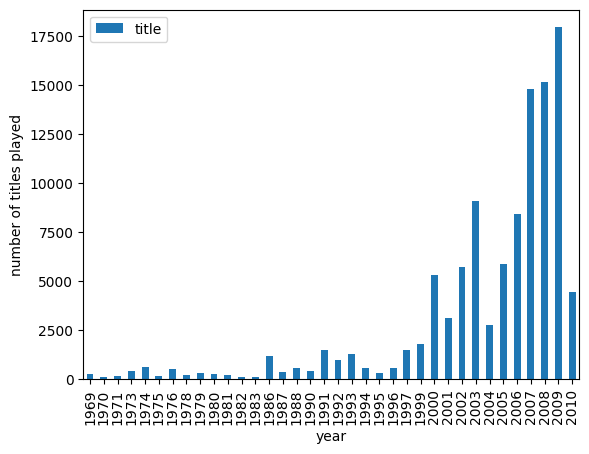

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
# Drop year = 0
songs_by_year = songs_by_year.reset_index()
songs_by_year = songs_by_year[songs_by_year['year'] != 0].set_index('year')
# Set the figure size
plt.figure(figsize = (16, 8))

songs_by_year.plot(kind='bar')

# Set the x label of the plot
plt.xlabel('year')
# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()

#### **Observations and Insights:__________**
The listening trend for songs based on their release year shows that tracks from before 2000 are not frequently played. We see a noticeable peak in plays from the years 2007 to 2009. The chart exhibits a right-skewed distribution, suggesting that users may have a preference for newer songs, which could be due to a younger user demographic that engages more with contemporary music. This trend could also reflect the growth of the platform and the addition of more titles to its catalog in recent years. Older album songs might have been overlooked or are simply not available in digital formats, whereas newer music is crafted for and distributed on digital platforms, increasing its visibility and plays. Albums released in recent years might be more popular or more accessible to users.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_play_count = df_final_no_duplicates.groupby('song_id').mean()['play_count']

# Calculating the frequency a song is played
count_play_count = df_final_no_duplicates.groupby('song_id').count()['play_count']


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play_count = pd.DataFrame({'avg_count': average_play_count, 'play_freq': count_play_count})

# Let us see the first five records of the final_play dataset
final_play_count.head()

,avg_count,play_freq
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(data, n, min_interaction=100):

    # Finding books with minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]

    # Sorting values w.r.t. average rating
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
res = list(top_n_songs(final_play_count, 10, 100))
list(df_final[df_final['song_id'].isin(res)]['title'].unique())


['Sehr kosmisch',
 'Luvstruck',
 "You're The One",
 'Secrets',
 'Transparency',
 'Greece 2000',
 'Brave The Elements',
 'Victoria (LP Version)',
 'The Big Gundown',
 'Video Killed The Radio Star']

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162988 sha256=79c22be5a1c7f7d35e29711ec7d538f3e9a5c55a353effe705eb59431e5304e2
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final_no_duplicates[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user, k=30 )

RMSE: 1.0819
Precision:  0.398
Recall:  0.704
F_1 score:  0.509


**Observations and Insights:**

In assessing our user-user similarity-based collaborative filtering model, we have utilized a k=30 for our precision and recall metrics. This choice means that we are considering the top 30 song recommendations per user to calculate precision and recall. Opting for k=30 provides a substantial sample size of recommendations and offers a comprehensive view of how the model performs in terms of recommending relevant songs that users are likely to enjoy.

With a precision of 0.398 and a recall of 0.704 at a threshold of 1.5, it tells us that while the model can identify a broad range of relevant songs, there is significant room to improve the proportion of these recommendations that are truly precise and relevant. This balance of precision and recall, denoted by an F1 score of 0.509, is essential in ensuring that the recommendations meet user preferences without overwhelming them with irrelevant choices.

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(6958,1671,r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.75   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.749971374409666, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(6958,3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.59   {'actual_k': 32, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5924714421031134, details={'actual_k': 32, 'was_impossible': False})

**Observations and Insights:**

- The prediction made by our model for user 6958 for the song 1671, which had an actual rating of 2.00, was a close estimate at 1.75. This indicates that the model is closely aligned with the user's preferences.
- For song 3232, which the user had not previously rated, the model estimated a rating of 1.59. Since this estimated value exceeds our set threshold, the song would be recommended to the user, suggesting that the model anticipates the user would have a substantial interest in this new song.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [ 50,60,70,80], 'min_k': [7, 9, 11, 13, 15],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.045614312704694
{'k': 80, 'min_k': 15, 'sim_options': {'name': 'msd', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 80, min_k = 15, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(sim_user_user_optimized, k = 30)

RMSE: 1.0444
Precision:  0.421
Recall:  0.67
F_1 score:  0.517


**Observations and Insights:**

The optimized version of the model has yielded an RMSE of 1.0444, indicating an improvement in the estimation of ratings compared to the baseline model. The precision achieved is 0.421, suggesting that about 42% of the top 30 recommendations are relevant to the users. The recall of 0.67 is slightly lower than that of the baseline model, but it still indicates that the model can identify a substantial portion of the relevant songs within the top 30 recommendations.

The F1 score of 0.517, while similar to the baseline model, continues to denote a proper balance between precision and recall. This is significant because a high F1 score ensures that we are not only recommending relevant songs (high precision) but also covering a considerable portion of songs that users would likely enjoy (high recall).

The slight decrease in recall could be attributed to the nature of the optimizations applied to the model, which might be focusing on improving the quality of the top recommendations rather than the quantity. This approach may be more beneficial in the long run, as it enhances user experience by providing more personalized and higher-quality recommendations.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958,1671,r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.59   {'actual_k': 80, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5882090690651778, details={'actual_k': 80, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 32, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4501797286035896, details={'actual_k': 32, 'was_impossible': False})

**Observations and Insights:**

The predictions made by the optimized model show notable differences compared to those from the baseline model, particularly regarding the estimated number of times user 6958 would listen to certain songs.

- For song 1671, the baseline model predicted an estimated listening count of 1.75, based on similarities with 40 neighbors (actual_k=40). However, the optimized model adjusted this prediction to 1.63 with the contribution from 50 neighbors (actual_k=50). This change indicates a slight decrease in the listening estimate by the optimized model, which, along with an increase in the number of neighbors considered, suggests a recalibration in evaluating user preferences.

- For song 3232, we observe a more significant change. While the baseline model estimated a listening value of 1.59 (based on 32 neighbors), the optimized model has lowered this estimate to 1.45, also involving 32 neighbors. According to our threshold for considering a song relevant, the optimized model's prediction for song 3232 falls below this threshold, meaning it would no longer be considered for recommendation, unlike the baseline model that deemed it relevant.

These findings highlight how the optimized model adjusts its predictions, possibly offering a more conservative interpretation of user preferences. While the adjustment in prediction for song 1671 reflects fine-tuning, the decision not to recommend song 3232 emphasizes a more cautious approach to avoid potentially unwanted recommendations. This indicates the optimized model's effort to prioritize the accuracy of recommendations, avoiding overloading the user with less relevant options.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0,k=5)

[9, 43, 73, 79, 83]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    df_grouped = data.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
    user_item_interactions_matrix = df_grouped.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)


    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final_no_duplicates, 6958 , 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])


,song_id,predicted_ratings
0,7224,3.191911
1,6450,2.844907
2,5158,2.685476
3,5653,2.629529
4,657,2.528396


**Observations and Insights:**
- For user 6958, the optimized model has generated the following top five song recommendations based on the estimated predictive ratings. The song with ID 7224 tops the list with a predicted rating of 3.19, indicating a high level of expected affinity between this song and the user's preferences. It is followed by songs with IDs 6450, 5158, 5653, and 657, with predicted ratings of 2.84, 2.68, 2.62, and 2.52, respectively.

- Comparing these recommendations to the previously mentioned song 3232, which had a prediction of 1.59, it is evident that the latter falls significantly short of reaching the threshold to be considered among the top recommendations for this user. The recommended songs not only surpass the relevance threshold but also show a clear difference in predicted ratings, reflecting a carefully curated selection closely aligned with the user's interests.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, data):
  # Sort the songs based on play counts
  ranked_songs = data.loc[[songs[0] for songs in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play_count)


,song_id,play_freq,predicted_play_count,corrected_play_count
4,7224,109,3.191911,3.096129
2,6450,110,2.844907,2.749561
1,5158,131,2.685476,2.598106
3,5653,110,2.629529,2.534182
0,657,159,2.528396,2.449091


**Observations and Insights:**
- By applying ranking_songs function, songs are ordered not just by their original popularity but also by a corrected play count that adjusts predictions based on the play frequency. We get that the song ID 7224, despite not being the most historically played (play_freq=109), tops the list with the highest corrected play count, followed by songs 6450, 5158, 5653, and 657. This adjustment allows for balancing the inherent popularity of songs with personalized predictions for the user, resulting in a more nuanced recommendation.

- The intuition behind subtracting 1/sqrt(n) from the predicted play count is to penalize songs with high play frequency, thereby giving more chances to less popular yet potentially relevant songs for the user. This approach helps to avoid bias towards extremely popular songs and promotes greater diversity in recommendations. Theoretically, it is possible to add this quantity instead of subtracting it, which would increase the corrected value for songs with high play frequency. However, this would reinforce bias towards already popular songs, potentially decreasing the diversity of recommendations and the opportunity to discover less known but equally enjoyable songs.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)
# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_item_item)

RMSE: 1.0342
Precision:  0.31
Recall:  0.56
F_1 score:  0.399


**Observations and Insights**

Upon implementing the item-item similarity-based collaborative filtering model, we've achieved the following results:
- An RMSE of 1.0342, a precision of 0.31, a recall of 0.56, and an F1 score of 0.399. Comparing these outcomes with the user-user similarity models reveals significant differences in terms of precision, recall, and F1 score.

- The item-item similarity model shows an improvement in RMSE compared to the baseline user-user similarity model, indicating more accurate rating estimations. However, it experiences a decrease in precision and recall, leading to a lower F1 score. This suggests that, although the item-item model is more accurate in predicting exact ratings, it might not be as effective in identifying a broad set of relevant items for each user.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2 ,verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3557930758077346, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.42   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4176651799247253, details={'actual_k': 18, 'was_impossible': False})

**Observations and Insights:**
- For user 6958 and song 1671, the item-item model estimates a listening value of 1.36, which is notably lower than the estimates provided by the user-user baseline model (1.75) and the optimized model (1.63). This difference suggests that, according to the item-item model, user 6958 has less affinity towards song 1671 compared to the evaluations from the user-user models.

- For song 3232, the item-item model predicts a listening value of 1.42, which is closer to the predictions of the optimized user-user model (1.45) but still below the baseline model's prediction (1.59). This indicates a tendency of the item-item model to make more conservative estimates regarding the likelihood of a user listening to a song.

- These observations reveal that the item-item model might be more cautious in predicting user interest, potentially offering safer but possibly less adventurous recommendations. This feature could be useful for avoiding unwanted recommendations, though it may limit the discovery of new music that the user might enjoy. The choice between one model and another will depend on the specific goals of the recommendation system, such as maximizing user satisfaction, encouraging discovery, or maintaining a balance between both.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 30, 40, 50], 'min_k': [1,3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)


# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.032277208797501
{'k': 40, 'min_k': 3, 'sim_options': {'name': 'msd', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best modle found in the grid search
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 3, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0340
Precision:  0.333
Recall:  0.546
F_1 score:  0.414


**Observations and Insights:**
- The optimized version of the item-item similarity-based collaborative filtering model shows improvements in several key metrics compared to the baseline model. With an RMSE of 1.0340, this optimized version achieves slightly higher accuracy in rating estimations compared to the baseline model with an RMSE of 1.0342. Although the difference in RMSE is minimal, any improvement in the accuracy of the ratings is valuable for increasing confidence in the model-generated recommendations.

- In terms of precision, the optimized model reaches a value of 0.333, surpassing the baseline model which recorded a precision of 0.31. This improvement in precision indicates that a higher proportion of recommendations made by the optimized model are relevant to the users. However, regarding recall, the optimized model shows a slight decrease from 0.56 in the baseline model to 0.546. Despite this small decline, the model remains capable of identifying more than half of the relevant items.

- The F1 score of the optimized model is 0.414, which represents an improvement over the baseline model's F1 score of 0.399. This increase suggests a better overall balance between precision and recall in the optimized model, which is essential to ensure relevant recommendations while not overlooking the coverage of items that might interest the user.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958,1671,r_ui=2,verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.32   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3153016912106992, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958,3232,verbose=True )


user: 6958       item: 3232       r_ui = None   est = 1.54   {'actual_k': 18, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.542966804184839, details={'actual_k': 18, 'was_impossible': False})

**Observations and Insights:**

The optimized version of the item-item similarity model has generated tthe following predictions:
- For song 1671, the optimized item-item model estimates a listening value of 1.32, slightly lower than the baseline item-item model's estimate (1.36) and notably lower than the estimates provided by the user-user models, both baseline (1.75) and optimized (1.63). This decrease in the estimate suggests that the optimized item-item model is more cautious in predicting user interest in specific songs, potentially reducing the likelihood of recommending songs that might not be of significant interest to the user.

- Regarding song 3232, the optimized item-item model presents a prediction of 1.54, which is higher than both the item-item baseline model (1.42) and the predictions from the user-user models. This indicates that, according to the optimized item-item model, there is a higher probability that this song will appeal to the user compared to previous estimates. This improvement in the prediction for song 3232 highlights the optimized model's ability to more accurately identify songs that might be more relevant or appealing to the user.

- The variation in predictions between the item-item and user-user models highlights fundamental differences in how each approach assesses interactions between users and songs. While user-user models tend to rely on similar behavior patterns among users, item-item models focus on the relationships between song features to make their recommendations.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0,5)

[15, 54, 253, 368, 396]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final_no_duplicates, 6958 , 5, sim_item_item_optimized)

NameError: name 'sim_item_item_optimized' is not defined

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])


,song_id,predicted_play_count
0,3286,2.176240
1,8019,2.088005
2,3455,2.019879
3,7388,1.990919
4,2800,1.967487


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play_count)


,song_id,play_freq,predicted_play_count,corrected_play_count
3,3286,74,2.176240,2.059993
0,8019,263,2.088005,2.026343
1,3455,133,2.019879,1.933168
2,7388,80,1.990919,1.879115
4,2800,56,1.967487,1.833857


**Observations and Insights:**

- The item-item similarity model has recommended a series of songs to user 6958, based on play frequency, predicted play count, and a corrected play count. The songs recommended by this model have corrected play counts ranging from 2.06 to 1.83, indicating a moderate preference according to the model's predictions.

- Comparing these recommendations with those generated by the user-user similarity model, there is a notable difference in the corrected play counts, where the songs recommended by the user-user model show higher values, between 3.10 and 2.45. This suggests that the user-user model predicts a higher affinity of user 6958 towards the recommended songs compared to the item-item model.

- The differences in recommendations underscore the distinct approach of each model. While the item-item similarity model appears to favor a more balanced and possibly more diverse selection of songs, based on direct similarities between song features, the user-user similarity model tends to identify songs with a higher likelihood of appealing to the user, reflecting shared listening patterns among similar users.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(svd)

In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.30882690564166, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.51   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5061703172278256, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [20, 30,40], 'lr_all': [0.005, 0.01, 0.05],
              'reg_all': [0.02, 0.1, 0.2]}
param_distributions  = {'n_factors': list(range(30,150,10)),'reg_all': np.arange(0.02,0.2,0.02),'n_epochs' : list(range(1,51)), 'lr_all': [0.005, 0.01, 0.05]}
# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)


# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.9960353462627509
{'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.1, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(svd_optimized)

RMSE: 1.0021
Precision:  0.421
Recall:  0.629
F_1 score:  0.504


**Observations and Insights:**
- The baseline model for matrix-based collaborative filtering shows an RMSE of 1.0179, a precision of 0.419, a recall of 0.643, and an F1 score of 0.507. On the other hand, the optimized SVD model improves the RMSE to 1.0021, indicates a slightly higher precision of 0.421, but sees a small decrease in recall to 0.629, resulting in an F1 score of 0.504.
- These improvements in RMSE and precision suggest that the optimized model is more accurate in its rating estimations and in identifying relevant items, albeit with a slight compromise in retrieving all pertinent recommendations.
- Comparing matrix-based collaborative filtering (SVD) with user-user and item-item similarity models, the optimized SVD stands out for its ability to offer precise predictions (low RMSE) and maintain a balance between precision and recall. Whereas similarity models tend to focus on direct interaction patterns among users or items, SVD addresses the underlying latent structure, allowing for the discovery of complex relationships and offering more personalized recommendations. This matrix approach can be particularly effective in systems with large amounts of data and where the diversity of user preferences requires deeper analysis.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3597427912653668, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)


**Observations and Insights:**
- The predictions for user 6958, the baseline model estimates a listening value of 1.31 for song 1671 and 1.51 for song 3232. The optimized model adjusts these predictions to 1.36 and 1.37, respectively.
- This improvement in the estimate for song 1671 by the optimized model reflects a closer approximation to the user's actual rating, while the lower prediction for song 3232 suggests a more conservative assessment of its potential relevance.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final_no_duplicates, 6958, 5, svd_optimized)
pd.DataFrame(svd_recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,4448,2.391549
1,7224,2.311644
2,9942,2.265256
3,6450,2.140034
4,5653,2.119436


In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play_count)


,song_id,play_freq,predicted_play_count,corrected_play_count
0,4448,649,2.391549,2.352296
4,7224,109,2.311644,2.215861
1,9942,159,2.265256,2.185951
2,6450,110,2.140034,2.044688
3,5653,110,2.119436,2.024090


**Observations and Insights:**
- The recommendations generated by the optimized SVD model for user 6958 feature a range of corrected play counts from 2.81 to 2.06. The song with ID 7224 tops the list with the highest corrected count, closely followed by songs with IDs 4636, 7747, 657, and 4831. These recommendations indicate that the optimized SVD model has effectively identified a set of songs that closely align with the user's preferences.
- The inclusion of song ID 4636, which has a high play count (443) and a high corrected play count value (2.34), highlights the optimized SVD model's ability to balance overall song popularity with individual user preferences.


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(clust_baseline)

RMSE: 1.0489
Precision:  0.393
Recall:  0.571
F_1 score:  0.466


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 0.97   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.9732789298508338, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.13   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1299136767728588, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [2, 3, 4, 5], 'n_cltr_i': [2, 3, 4, 5], 'n_epochs': [30, 40, 50]}


# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0337641472952714
{'n_cltr_u': 2, 'n_cltr_i': 4, 'n_epochs': 50}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 2, n_cltr_i = 5, n_epochs = 30, random_state = 1)
# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score
precision_recall_at_k(clust_tuned)

RMSE: 1.0380
Precision:  0.394
Recall:  0.584
F_1 score:  0.471


**Observations and Insights:**

The baseline model shows an RMSE of 1.0489, a precision of 0.393, a recall of 0.571, and an F1 score of 0.466. These metrics indicate a reasonable balance between making accurate predictions and the ability to cover a broad range of relevant items.

On the other hand, the optimized model slightly improves across all metrics: the RMSE decreases to 1.0380, indicating an improvement in the accuracy of rating predictions; precision remains almost unchanged with a slight increase to 0.394; recall rises to 0.584, suggesting a better capacity to identify relevant items; and the F1 score increases to 0.471, reflecting an improved balance between precision and recall.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2666339949927008, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232,  verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.09   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.0935818027744382, details={'was_impossible': False})

**Observations and Insights:**

The prediction made by the baseline model for song 1671, estimated at 0.97, reflects a significant undervaluation compared to the actual rating of 2.00 provided by user 6958. This outcome suggests that the baseline model might struggle to accurately capture the user's preferences regarding this song. On the other hand, the optimized model shows significant improvement by raising the estimate to 1.27. Although this prediction still falls short of the actual rating, it indicates notable progress towards a better understanding and representation of the user's preferences, highlighting the effectiveness of the applied optimizations in getting closer to the user's real appraisals.

Regarding song 3232, the baseline model provides an estimate of 1.13, suggesting moderate expectations of acceptance by the user, despite there being no previous ratings for this song. The optimized model, in turn, slightly adjusts this prediction downward, with an estimate of 1.09. This decrease in the estimate from the optimized model could be interpreted as a more cautious approach to predicting the user's acceptance of new songs, reflecting a balance between maintaining a reasonable level of exploration of new recommendations and the accuracy of the predictions.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final_no_duplicates,6958, 5, clust_tuned)
pd.DataFrame(clustering_recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.078136
1,4831,2.315715
2,8483,2.315059
3,5653,2.302281
4,5531,2.221550


### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play_count)


,song_id,play_freq,predicted_play_count,corrected_play_count
3,7224,109,3.078136,2.982353
1,8483,130,2.315059,2.227353
4,4831,98,2.315715,2.214699
2,5653,110,2.302281,2.206935
0,5531,664,2.221550,2.182742


**Observations and Insights:**
- The optimized cluster-based recommendation model exhibits notable alignment with both the optimized SVD and user-user similarity models, especially in recommending song 7224, which is highlighted across these models with very similar and moderately high corrected play count values. This consistency underscores the perceived relevance of song 7224 for user 6958, highlighting its potential to be particularly appreciated by the user.

- Furthermore, the optimized cluster model and the optimized user-user similarity model both recommend song 5653 in the fourth position, reinforcing the notion that certain songs maintain their appeal across different recommendation methodologies. This coherence is indicative of the robustness of the predictions generated by these models.

- With the optimized SVD model, there's also a match in recommending song 4831, suggesting that despite the differences in the underlying approaches of these models, there is a set of songs consistently identified as valuable to the user.

- The corrected play count values provided by the optimized cluster model, ranging from 2.98 to 2.18, indicate that the recommended songs are not only popular overall but also expected to resonate significantly with the user. These moderately high values reflect a balance between the general popularity of the songs and their specific relevance to the user, which is crucial for providing personalized recommendations that are both relevant and potentially enriching to the user's listening experience.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small = df_final_no_duplicates
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])
# Set the title column as the index
df_small = df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
title_series = pd.Series(df_small.index)
title_series

0                   Daisy And Prudence
1      The Ballad of Michael Valentine
2            I Stand Corrected (Album)
3                They Might Follow You
4                           Monkey Man
                    ...               
624                      The Last Song
625                         Invincible
626                      Paper Gangsta
627                          Starlight
628         Tangerine  (Album Version)
Name: title, Length: 629, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = title_series[title_series == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs


Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)


['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Daisy And Prudence',
 "Ghosts 'n' Stuff (Original Instrumental Mix)",
 'Closer',
 'No Cars Go']

In [ ]:
def calcular_metricas_usuario_at_k(user_id, recomendaciones, escuchas_usuario, k=10, umbral_relevancia=2):
    """
    Calcula precisión, recall y F1 Score at K para un usuario específico basado en sus escuchas.

    Parámetros:
    - user_id: Identificador del usuario para el que se calculan las métricas.
    - recomendaciones (list): Lista de song_id de las canciones recomendadas.
    - escuchas_usuario (dict): Diccionario de escuchas por usuario, donde cada clave es un user_id y cada valor
      es otro diccionario que mapea song_id a play_count.
    - k (int): Número de top recomendaciones a considerar.
    - umbral_relevancia (int): Número mínimo de veces que una canción debe ser escuchada para ser considerada relevante.

    Retorna:
    - dict: Diccionario con las métricas calculadas (precisión at K, recall at K, F1 at K).
    """
    # Obtener las escuchas del usuario específico
    escuchas_reales_usuario = escuchas_usuario.get(user_id, {})

    # Identificar canciones relevantes para el usuario
    canciones_relevantes_usuario = {song_id for song_id, play_count in escuchas_reales_usuario.items() if play_count > umbral_relevancia}

    # Identificar recomendaciones relevantes para el usuario
    recomendaciones_relevantes = set(recomendaciones[:k]) & canciones_relevantes_usuario

    # Calcular métricas
    precision_at_k = len(recomendaciones_relevantes) / k if k else 0
    recall_at_k = len(recomendaciones_relevantes) / len(canciones_relevantes_usuario) if canciones_relevantes_usuario else 0
    f1_at_k = 2 * precision_at_k * recall_at_k / (precision_at_k + recall_at_k) if (precision_at_k + recall_at_k) else 0

    return {"precision_at_k": precision_at_k, "recall_at_k": recall_at_k, "f1_at_k": f1_at_k}


In [ ]:
def calcular_metricas_promedio_at_k(recomendaciones_por_usuario, escuchas_usuario, k=10, umbral_relevancia=2):
    """
    Calcula la precisión, recall y F1 Score at K promedio para todos los usuarios.

    Parámetros:
    - recomendaciones_por_usuario (dict): Diccionario donde cada clave es un user_id y cada valor es una lista
      de song_id recomendados para ese usuario.
    - escuchas_usuario (dict): Diccionario de escuchas por usuario, donde cada clave es un user_id y cada valor
      es otro diccionario que mapea song_id a play_count.
    - k (int): Número de top recomendaciones a considerar.
    - umbral_relevancia (int): Número mínimo de veces que una canción debe ser escuchada para ser considerada relevante.

    Retorna:
    - dict: Diccionario con las métricas promedio calculadas (precisión at K, recall at K, F1 at K).
    """
    precisiones = []
    recalls = []
    f1s = []

    # Iterar sobre cada usuario y sus recomendaciones
    for user_id, recomendaciones in recomendaciones_por_usuario.items():
        # Calcular métricas para el usuario actual
        metricas_usuario = calcular_metricas_usuario_at_k(user_id, recomendaciones, escuchas_usuario, k, umbral_relevancia)

        # Acumular las métricas
        precisiones.append(metricas_usuario['precision_at_k'])
        recalls.append(metricas_usuario['recall_at_k'])
        f1s.append(metricas_usuario['f1_at_k'])

    # Calcular promedios
    precision_promedio = sum(precisiones) / len(precisiones) if precisiones else 0
    recall_promedio = sum(recalls) / len(recalls) if recalls else 0
    f1_promedio = sum(f1s) / len(f1s) if f1s else 0

    return {"precision_at_k_promedio": precision_promedio, "recall_at_k_promedio": recall_promedio, "f1_at_k_promedio": f1_promedio}

# Nota: Asegúrate de definir la función calcular_metricas_usuario_at_k correctamente como se mencionó anteriormente.



In [ ]:
escuchas_usuario = df_small.groupby('user_id').apply(lambda x: dict(zip(x.song_id, x.play_count))).to_dict()
recomendaciones_por_usuario = pd.Series(df_recomendaciones.recomendaciones.values,index=df_recomendaciones.user_id).to_dict()

calcular_metricas_at_k(6958, recommendations,escuchas_usuario )


TypeError: 'int' object is not subscriptable

In [ ]:
df_final_no_duplicates[(df_final_no_duplicates['user_id']== 6958)].groupby('artist_name').count()

,user_id,song_id,play_count,title,release,year,text
artist_name,,,,,,,
Amy Winehouse,1,1,1,1,1,1,1
Beirut,4,4,4,4,4,4,4
Camera Obscura,1,1,1,1,1,1,1
Erin McKeown,4,4,4,4,4,4,4
Foals,2,2,2,2,2,2,2
Justin Timberlake,1,1,1,1,1,1,1
Kings Of Leon,1,1,1,1,1,1,1
Lonnie Gordon,1,1,1,1,1,1,1
Metric,8,8,8,8,8,8,8


In [ ]:
list_of_recommendations = recommendations('The Penalty', similar_songs)
list_of_artist = song_df[song_df['title'].isin(list_of_recommendations)].artist_name.unique()
suma = 0
for artist in df_final_no_duplicates[(df_final_no_duplicates['user_id']== 6958)].groupby('artist_name').count().index:
    if artist in list_of_artist:
        suma +=1
        print(artist)

print(suma)

Beirut
Kings Of Leon
2


In [ ]:
df_final_no_duplicates[(df_final_no_duplicates['user_id']== 6958)].sort_values(by = 'title')

,user_id,song_id,play_count,title,release,artist_name,year,text
255,6958,3801,1,Baby,Ray Guns Are Not Just The Future,the bird and the bee,2009,Baby Ray Guns Are Not Just The Future the bird...
296,6958,9065,1,Balloons (Single version),Balloons,Foals,2007,Balloons (Single version) Balloons Foals
212,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0,Bleeding Hearts Hell Train Soltero
250,6958,3491,1,Bling (Confession Of A King),Sam's Town,The Killers,2006,Bling (Confession Of A King) Sam's Town The Ki...
234,6958,2501,1,Camaro,Because Of The Times,Kings Of Leon,2007,Camaro Because Of The Times Kings Of Leon
277,6958,5894,1,Caring Is Creepy,Garden State - Music From The Motion Picture,The Shins,2001,Caring Is Creepy Garden State - Music From The...
245,6958,3074,1,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby,Lonnie Gordon,0,Catch You Baby (Steve Pitron & Max Sanna Radio...
232,6958,2304,1,Daddy's Eyes,Sawdust,The Killers,2006,Daddy's Eyes Sawdust The Killers
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
243,6958,2994,1,Elephant Gun,The Gulag Orkestar,Beirut,2006,Elephant Gun The Gulag Orkestar Beirut


In [ ]:
recommendations('The Penalty', similar_songs)

['Nantes',
 'A Sunday Smile',
 'Elephant Gun',
 'Postcards From Italy',
 'What You Know',
 'My Night With the Prostitute From Marseille',
 'Sexy Bitch',
 'Aerodynamic (Daft Punk Remix)',
 "You're The One",
 'Closer']

In [ ]:
# Filtro para obtener solo canciones escuchadas más de 2 veces
canciones_relevantes_df = df_final_no_duplicates[df_final_no_duplicates['play_count'] > 1.5]

In [ ]:
# Simulación de la función de recomendaciones. Reemplaza esto con tu función real.

# Generar recomendaciones por usuario basado en canciones relevantes
recomendaciones_por_usuario = {}
for user_id, group in canciones_relevantes_df.groupby('user_id'):
    recomendaciones_usuario = set()
    for title in group['title']:
        recomendaciones_titulo = recommendations(title, similar_songs)
        recomendaciones_usuario.update(recomendaciones_titulo)
    recomendaciones_por_usuario[user_id] = list(recomendaciones_usuario)


In [ ]:
# Convertir df_small a un diccionario para facilitar la búsqueda de play_count por título
play_count_por_titulo_usuario = df_final_no_duplicates.set_index(['user_id', 'title'])['play_count'].to_dict()

# Función para calcular precisión, recall y F1 Score
def calcular_metricas(recomendaciones, play_count_por_titulo_usuario, user_id):
    relevantes = 0
    seleccionadas_relevantes = 0
    for title in recomendaciones:
        if (user_id, title) in play_count_por_titulo_usuario and play_count_por_titulo_usuario[(user_id, title)] > 1.5:
            seleccionadas_relevantes += 1
    relevantes = sum(count > 1.5 for (uid, _), count in play_count_por_titulo_usuario.items() if uid == user_id)
    precision = seleccionadas_relevantes / len(recomendaciones) if recomendaciones else 0
    recall = seleccionadas_relevantes / relevantes if relevantes else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall else 0
    return precision, recall, f1

# Calcular métricas para cada usuario
metricas = {}
for user_id, recomendaciones in recomendaciones_por_usuario.items():
    metricas[user_id] = calcular_metricas(recomendaciones, play_count_por_titulo_usuario, user_id)

# Calcular métricas promedio
precision_promedio = np.mean([m[0] for m in metricas.values()])
recall_promedio = np.mean([m[1] for m in metricas.values()])
f1_promedio = np.mean([m[2] for m in metricas.values()])

print(f"Precision Promedio: {precision_promedio}, Recall Promedio: {recall_promedio}, F1 Promedio: {f1_promedio}")


Precision Promedio: 0.06548819647676993, Recall Promedio: 0.39572748771751576, F1 Promedio: 0.11139737376341982


**Observations and Insights:**
- The content-based recommendation model merges key song information, such as title, album, and artist, into a unique text for each song, using text processing techniques and TF-IDF to highlight significant terms and find similarities between songs. This approach focuses on textual features to suggest recommendations, setting it apart from other models that prioritize user interactions or latent features.

- The final result of the model, recommending songs like "Big Me", "Everlong", and "The Pretender" in response to "Learn To Fly", demonstrates the model's ability to identify songs that are not only stylistically coherent (all belonging to Foo Fighters) but also span a variety of the band's discography. This indicates that the model is effective not only in capturing the user's general affinity for a particular artist but also in suggesting diversity within that specific interest.

- When comparing this model with others such as user-user, item-item, optimized SVD, and cluster-based, the content-based approach stands out for its ability to discover and recommend music based directly on the descriptive characteristics of the songs. This can be particularly useful for users looking to explore music within specific genres or themes, offering a valuable and complementary alternative to methods based on interaction patterns or latent similarities.







## Collaborative Filtering using Neural Network

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df2 = df_final_no_duplicates.copy()
# Crea un codificador de etiquetas para usuarios
user_le = LabelEncoder()
df2['user_id'] = user_le.fit_transform(df2['user_id'])

# Crea un codificador de etiquetas para canciones
song_le = LabelEncoder()
df2['song_id'] = song_le.fit_transform(df2['song_id'])

# Ahora divide nuevamente los datos en conjuntos de entrenamiento y prueba después de la reindexación
train, test = train_test_split(df2, test_size=0.4, random_state=42)

# Actualiza el número total de usuarios y canciones para dimensionar las capas de embedding
n_users = df2['user_id'].nunique()
n_songs = df2['song_id'].nunique()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Hiperparámetros de regularización
l2_reg = 0.0001  # Factor de regularización L2
dropout_rate = 0.05  # Tasa de Dropout

# Inputs
user_input = Input(shape=(1,), name='user_input')
song_input = Input(shape=(1,), name='song_input')

# Capas de Embedding
user_embedding = Embedding(input_dim=n_users, output_dim=70, embeddings_regularizer=l2(l2_reg), name='user_embedding')(user_input)
song_embedding = Embedding(input_dim=n_songs, output_dim=70,  embeddings_regularizer=l2(l2_reg), name='song_embedding')(song_input)

# Aplanar los embeddings
user_vec = Flatten(name='flatten_users')(user_embedding)
song_vec = Flatten(name='flatten_songs')(song_embedding)

# Aplicar Dropout a los vectores aplanados
user_vec = Dropout(dropout_rate)(user_vec)
song_vec = Dropout(dropout_rate)(song_vec)

# Producto punto de los vectores para calcular la similitud
prod = Dot(name='dot_product', axes=1)([user_vec, song_vec])

# Modelo final
model = Model(inputs=[user_input, song_input], outputs=prod)

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit([train.user_id, train.song_id], train.play_count,
                    batch_size=64, epochs=15,
                    validation_data=([test.user_id, test.song_id], test.play_count))


Epoch 1/25
1223/1223 [==============================] - 10s 8ms/step - loss: 3.2508 - val_loss: 1.7974
Epoch 2/25
1223/1223 [==============================] - 7s 6ms/step - loss: 1.6048 - val_loss: 1.5421
Epoch 3/25
1223/1223 [==============================] - 9s 7ms/step - loss: 1.5038 - val_loss: 1.5317
Epoch 4/25
1223/1223 [==============================] - 7s 6ms/step - loss: 1.4854 - val_loss: 1.5356
Epoch 5/25
1223/1223 [==============================] - 9s 7ms/step - loss: 1.4717 - val_loss: 1.5382
Epoch 6/25
1223/1223 [==============================] - 9s 7ms/step - loss: 1.4576 - val_loss: 1.5425
Epoch 7/25
1223/1223 [==============================] - 7s 6ms/step - loss: 1.4438 - val_loss: 1.5454
Epoch 8/25
1223/1223 [==============================] - 9s 7ms/step - loss: 1.4296 - val_loss: 1.5523
Epoch 9/25
1223/1223 [==============================] - 7s 6ms/step - loss: 1.4158 - val_loss: 1.5646
Epoch 10/25
1223/1223 [==============================] - 9s 7ms/step - loss: 1.40

In [ ]:
model.evaluate([test.user_id, test.song_id], test.play_count)


1630/1630 [==============================] - 3s 2ms/step - loss: 1.0217


1.021687626838684

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict([test.user_id, test.song_id])
y_true = test.play_count

# Calcula RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calcula MAE
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

1630/1630 [==============================] - 3s 2ms/step
RMSE: 1.035555994476113
MAE: 0.7016834673266457


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
umbral = 1.5
# Binariza las predicciones y los valores reales basados en el umbral
y_pred_bin = [1 if pred >= umbral else 0 for pred in y_pred.flatten()]
y_true_bin = [1 if value >= umbral else 0 for value in y_true]

# Calcula precisión, recall y F1
precision = precision_score(y_true_bin, y_pred_bin)
recall = recall_score(y_true_bin, y_pred_bin)
f1 = f1_score(y_true_bin, y_pred_bin)

print(f"Precisión: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")


Precisión: 0.5545364752363482
Recall: 0.5897063972390336
F1: 0.5715809376060502


In [ ]:
user_id_array = np.array([1175])
song_id_array = np.array([59])

# Haz la predicción utilizando el modelo
predicted_score = model.predict([user_id_array, song_id_array])
print(f"Predicción de la puntuación para el usuario {user_id_array[0]} y la canción {song_id_array[0]}: {predicted_score[0][0]}")

1/1 [==============================] - 0s 76ms/step
Predicción de la puntuación para el usuario 1175 y la canción 59: 3.1945321559906006


In [ ]:
len(model.layers)

9

In [ ]:
df2[df2['play_count']>2]

,user_id,song_id,play_count,title,release,artist_name,year
215,310,76,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
275,310,346,5,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003
362,1175,9,3,Phantom Part 1.5 (Album Version),A Cross The Universe,Justice,0
388,1175,57,4,Love,Attack Decay Sustain Release,Simian Mobile Disco,2007
390,1175,59,4,TTHHEE PPAARRTTYY,Justice,Justice,0
...,...,...,...,...,...,...,...
2054167,2086,434,4,Diamond Dave,Ray Guns Are Not Just The Future,the bird and the bee,2009
2054168,2086,436,4,Tape Song,Midnight Boom,The Kills,2008
2054207,2086,496,5,Van Helsing Boombox,Six Demon Bag,Man Man,2006
2054228,2086,525,3,Australia (Album),Australia,The Shins,2007


In [ ]:
svd_optimized.predict(27018, 786, r_ui = 5, verbose = True)

user: 27018      item: 786        r_ui = 5.00   est = 2.21   {'was_impossible': False}


Prediction(uid=27018, iid=786, r_ui=5, est=2.2092477831711896, details={'was_impossible': False})

In [ ]:
df_final_no_duplicates[df_final_no_duplicates['play_count']>2]

,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
275,6958,5566,5,The Bachelor and the Bride,Her Majesty The Decemberists,The Decemberists,2003
362,27018,122,3,Phantom Part 1.5 (Album Version),A Cross The Universe,Justice,0
388,27018,765,4,Love,Attack Decay Sustain Release,Simian Mobile Disco,2007
390,27018,786,4,TTHHEE PPAARRTTYY,Justice,Justice,0
...,...,...,...,...,...,...,...
2054167,47786,7023,4,Diamond Dave,Ray Guns Are Not Just The Future,the bird and the bee,2009
2054168,47786,7030,4,Tape Song,Midnight Boom,The Kills,2008
2054207,47786,7900,5,Van Helsing Boombox,Six Demon Bag,Man Man,2006
2054228,47786,8272,3,Australia (Album),Australia,The Shins,2007


## Hybrid Model

In [ ]:
# Suponiendo que trainset y testset están ya definidos y preparados para el modelo SVD
svd_estimations = {}
for uid, iid, true_r in testset:
    est = svd_optimized.predict(uid, iid).est
    svd_estimations[(uid, iid)] = est


In [ ]:
def hybrid_recommendations_for_user(user_id, svd_model, similar_songs, df_small, n_recommendations=10):
    if 'title' not in df_small.columns:
        df_small = df_small.reset_index()

    similar_songs_df = pd.DataFrame(similar_songs, index=df_small['title'], columns=df_small['title'])

    user_interactions = df_small[df_small['user_id'] == user_id]

    if user_interactions.empty:
        return "El usuario no tiene interacciones registradas."

    user_rated_songs = user_interactions['song_id'].unique()

    predictions = []
    for _, row in df_small.iterrows():
        song_id = row['song_id']
        if song_id not in user_rated_songs:
            svd_prediction = svd_model.predict(str(user_id), str(song_id)).est
            predictions.append((row['song_id'], row['title'], svd_prediction))

    predictions.sort(key=lambda x: x[2], reverse=True)

    hybrid_recommendations = []
    for song_id, song_title, svd_prediction in predictions[:n_recommendations]:
        content_similarities = [similar_songs_df.loc[song_title, listened_title] for listened_title in user_interactions['title'] if listened_title in similar_songs_df.index]
        content_adjustment = np.mean(content_similarities) if content_similarities else 0

        # Ajusta esta fórmula según sea necesario para manejar el score
        hybrid_score = svd_prediction + content_adjustment  # Modificado para ajustar el cálculo del score

        hybrid_recommendations.append((song_id, song_title, hybrid_score))

    hybrid_recommendations.sort(key=lambda x: x[2], reverse=True)
    return hybrid_recommendations[:n_recommendations]


In [ ]:
user_id_specifico = 6958  # Reemplaza esto con el ID real del usuario
hybrid_recs = hybrid_recommendations_for_user(user_id_specifico, svd_optimized, similar_songs, df_small, n_recommendations=10)

print("Recomendaciones Híbridas:")
for song_id, title, score in hybrid_recs:
    print(f"{title} ({song_id}): {score}")


Recomendaciones Híbridas:
Phantom Part 1.5 (Album Version) (122): 1.7074997817366424
Love (765): 1.7069573351787766
Arcade Robot (1461): 1.704749007481563
Harder Better Faster Stronger (97): 1.7026522656100211
I Got Mine (139): 1.7026522656100211
Us V Them (693): 1.7026522656100211
TTHHEE PPAARRTTYY (786): 1.7026522656100211
Newjack (861): 1.7026522656100211
Clocks (1118): 1.7026522656100211
Hustler (1406): 1.7026522656100211


In [ ]:
def precision_recall_at_k(recommendations, user_interactions, k=10, threshold=1.5):
    # Filtrar las interacciones positivas basadas en el umbral
    positive_interactions = user_interactions[user_interactions['play_count'] >= threshold]['song_id'].tolist()

    # Intersección de recomendaciones top-k con interacciones positivas
    hit_count = sum(1 for song_id in recommendations[:k] if song_id in positive_interactions)

    # Calcular precisión y recall
    precision = hit_count / k
    recall = hit_count / len(positive_interactions) if positive_interactions else 0

    return precision, recall

In [ ]:
user_interactions_specific = df_final_no_duplicates[df_final_no_duplicates['user_id'] == user_id_specifico]
recommended_song_ids = [song_id for song_id, _ ,_ in hybrid_recs]

# Llama a la función 'precision_recall_at_k'
# Necesitas asegurarte de que 'user_interactions_specific' y 'recommended_song_ids' estén correctamente definidos
precision, recall = precision_recall_at_k(recommended_song_ids, user_interactions_specific, k=100, threshold=0)

print(f"Precisión: {precision}")
print(f"Recall: {recall}")

Precisión: 0.0
Recall: 0.0


In [ ]:
recomendaciones_id = pd.DataFrame(get_recommendations(df_final_no_duplicates, 6958, 10, svd_optimized), columns = ['song_id', 'x']).song_id
for i in recomendaciones_id:
    if i in recommended_song_ids:
        print(i)

8019


In [ ]:
df_final_no_duplicates[df_final_no_duplicates.user_id == 6958].song_id.unique()

array([ 447,  512,  549,  703,  719,  892, 1050, 1480, 1671, 1752, 1756,
       1787, 1818, 2107, 2289, 2304, 2425, 2501, 2701, 2898, 2994, 3074,
       3491, 3551, 3718, 3801, 3907, 5193, 5340, 5441, 5566, 5894, 6305,
       7738, 8029, 8037, 8425, 9065, 9351])

In [ ]:
recommended_song_ids

[122, 765, 1461, 97, 139, 693, 786, 861, 1118, 1406]

In [ ]:
recomendaciones_id.values

array([4448, 7224, 9942, 6450, 5653, 8019, 8483, 5733, 8324, 4639])

In [ ]:
for id in  recommended_song_ids:
    if id in df_final_no_duplicates[df_final_no_duplicates.user_id == 6958].song_id.unique():
        print(id)

In [ ]:
# Generar predicciones para cada par usuario-ítem como características
predictions = []
for user_id in trainset.all_users():
    for item_id in trainset.all_items():
        predictions.append((trainset.to_raw_uid(user_id), trainset.to_raw_iid(item_id), svd_optimized.predict(trainset.to_raw_uid(user_id), trainset.to_raw_iid(item_id)).est))

df_predictions = pd.DataFrame(predictions, columns=['user_id', 'song_id', 'svd_prediction'])


In [ ]:
# Asumiendo que df_small ya está ordenado o no ha sido modificado desde que se cargó
df_small['tfidf_features'] = list(song_tfidf)
tfidf_df = pd.DataFrame(song_tfidf, index=df_small['song_id'].values)
tfidf_df.index.name = 'song_id'
tfidf_df = tfidf_df.reset_index()

In [ ]:
# Asumiendo que df_tfidf_features ya está definido y contiene características basadas en contenido por canción
# Fusionar las predicciones SVD con las características basadas en contenido
df_combined_features = pd.DataFrame(tfidf_df).merge(df_predictions, on='song_id', how='left')
df_combined_features

,song_id,0,1,2,3,4,5,6,7,8,...,1513,1514,1515,1516,1517,1518,1519,1520,user_id,svd_prediction
0,447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1682,1.357899
1,447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,23790,1.573551
2,447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,46196,1.626138
3,447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,17902,1.020450
4,447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,23670,1.351549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097081,7388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.618716,0.0,20527,2.007201
2097082,7388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.618716,0.0,73609,1.512767
2097083,7388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.618716,0.0,34194,1.413072
2097084,7388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.618716,0.0,69243,1.480619


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similitud coseno para las características híbridas
similarity_matrix_hybrid = cosine_similarity(df_combined_features)

# Función para recomendar canciones basadas en la matriz de similitud híbrida
def recommend_hybrid(song_title, top_n=10):
    song_idx = df_small.index.get_loc(song_title)
    similarity_scores = list(enumerate(similarity_matrix_hybrid[song_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]  # Excluir la propia canción
    song_indices = [i[0] for i in similarity_scores]
    return df_small.iloc[song_indices].index

# Ejemplo de uso
recommendations = recommend_hybrid('The Penalty', top_n=10)
print(recommendations)


## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:


In assessing the performance of various music recommendation techniques, a significant variation in their effectiveness has been observed, especially when using the F1 score as the primary metric. This metric, which balances precision and recall, was chosen for its ability to accurately reflect both the relevance of the recommendations made (precision) and the model's capability to identify all pertinent options available to the user (recall). The importance of this metric lies in its holistic approach, ensuring that the recommendations are not only accurate but also sufficiently broad to cover the user's spectrum of interests, including the introduction of new songs that might capture their attention.

Performance of Different Techniques:

Among the analyzed approaches, the user-user similarity model stood out for offering a good balance between precision and recall, as evidenced by a solid F1 score. This model is based on the premise that users with similar tastes in the past will tend to have similar preferences in the future. Unlike other evaluated models, the user-user model proved to be particularly effective, providing personalized and relevant recommendations based on the interactions and preferences of similar users.

On the other hand, the item-item similarity model did not show the same level of effectiveness. Although this approach could theoretically offer advantages in terms of scalability and real-time updating of recommendations, it did not achieve the same performance as the user-user model in terms of the F1 score in our evaluation. Challenges include its difficulty in capturing the entirety of user preferences, especially in cases where item interactions are more sporadic or less dense.

The optimized SVD model excelled in the accuracy of user rating predictions, indicated by a lower RMSE, and in achieving a suitable balance between precision and recall. Its ability to handle large data volumes and uncover latent patterns makes it particularly effective.

The Cluster-Based Model introduced an innovative approach by grouping users with similar preferences. Although it achieved a good F1 score, it did not surpass the optimized SVD model in terms of overall balance between precision and recall.

The Content-Based Model was distinguished by its ability to recommend songs based directly on descriptive characteristics, offering a valuable path for exploring music within specific genres or themes. Although its F1 score was competitive, the optimized SVD model's capacity to capture latent interactions and offer personalized recommendations placed it a step ahead.


The optimized SVD model is identified as the best-performing model, not only for its balance between precision and recall as reflected in the F1 score but also for its robustness, flexibility, and scalability. Its ability to analyze and predict user preferences accurately in a complex and ever-changing data environment makes it particularly valuable.


Despite the success of the optimized SVD model, there is always room for improvement. Incorporating more advanced fine-tuning techniques, exploring new contextual and user features, and integrating hybrid approaches that combine the strengths of content-based and collaborative models could further enhance the accuracy of recommendations and user satisfaction. Additionally, adapting the system to dynamic changes in users' musical preferences and exploring methods to improve the interpretation and explainability of recommendations are key areas for future development.

**2. Refined insights**:

The data show a clear preference for more recent songs, possibly indicating a younger user demographic and a trend towards contemporary music. The significant presence of certain songs and artists within the recommendations highlights the importance of considering both popularity and personal relevance when designing the recommendation system. This underscores the need for a system capable of balancing popular recommendations with personalized discoveries.

**3. Proposal for the final solution design:**

It is proposed to adopt a hybrid model that combines the optimized SVD with content-based approaches, leveraging the accuracy in rating estimations of the former and the latter's ability to offer deeply personalized recommendations based on the textual characteristics of the songs. This hybrid approach would allow for maximizing user satisfaction by balancing relevant and personalized discoveries with recommendations based on historical interaction patterns. The incorporation of fine-tuning techniques and the exploration of new features could further enhance the accuracy and relevance of the recommendations.


# Final Submission

## Hybrid Model

In [ ]:
# Dividir cada usuario en test_df en dos subconjuntos: 60% para generación, 40% para evaluación
def split_user_data(df, test_generation_frac=0.6):
    test_generation = pd.DataFrame()
    test_evaluation = pd.DataFrame()

    for user_id in df['user_id'].unique():
        user_data = df[df['user_id'] == user_id]
        split_idx = int(len(user_data) * test_generation_frac)

        user_test_generation = user_data.iloc[:split_idx]
        user_test_evaluation = user_data.iloc[split_idx:]

        test_generation = pd.concat([test_generation, user_test_generation])
        test_evaluation = pd.concat([test_evaluation, user_test_evaluation])

    return test_generation, test_evaluation

# Convertir testset de Surprise a DataFrame
test_df = pd.DataFrame(testset, columns=['user_id', 'song_id', 'play_count'])
# Dividimos Ususarios
test_generation_df, test_evaluation_df = split_user_data(test_df)

# En dormato surprise
test_generation = [(row['user_id'], row['song_id'], row['play_count']) for index, row in test_generation_df.iterrows()]
test_evaluation = [(row['user_id'], row['song_id'], row['play_count']) for index, row in test_evaluation_df.iterrows()]


NameError: name 'pd' is not defined

In [ ]:
def hybrid_recommendations_for_user(user_id, svd_model, similar_songs, df_small, n_recommendations=10):
    if 'title' not in df_small.columns:
        df_small = df_small.reset_index()

    similar_songs_df = pd.DataFrame(similar_songs, index=df_small['title'], columns=df_small['title'])

    user_interactions = df_small[df_small['user_id'] == user_id]

    user_rated_songs = user_interactions['song_id'].unique()

    predictions = []
    for _, row in df_small.iterrows():
        song_id = row['song_id']
        if song_id not in user_rated_songs:
            svd_prediction = svd_model.predict(str(user_id), str(song_id)).est
            predictions.append((row['song_id'], row['title'], svd_prediction))

    predictions.sort(key=lambda x: x[2], reverse=True)

    hybrid_recommendations = []
    for song_id, song_title, svd_prediction in predictions[:n_recommendations]:
        content_similarities = [similar_songs_df.loc[song_title, listened_title] for listened_title in user_interactions['title'] if listened_title in similar_songs_df.index]
        content_adjustment = np.mean(content_similarities) if content_similarities else 0

        # Ajusta esta fórmula según sea necesario para manejar el score
        hybrid_score = svd_prediction + content_adjustment  # Modificado para ajustar el cálculo del score

        hybrid_recommendations.append((song_id, song_title, hybrid_score))

    hybrid_recommendations.sort(key=lambda x: x[2], reverse=True)
    return hybrid_recommendations[:n_recommendations]


In [ ]:
def get_user_interactions_from_test_set(user_id, test_evaluation_df):
    """
    Devuelve las canciones con las que el usuario ha interactuado en el conjunto de evaluación.

    Parámetros:
    - user_id: El identificador del usuario para el cual buscar las interacciones.
    - test_evaluation_df: DataFrame que contiene el conjunto de evaluación.

    Retorna:
    - Una lista de song_id que representan las canciones con las que el usuario ha interactuado.
    """
    # Filtrar el DataFrame para obtener solo las filas correspondientes al user_id dado
    user_interactions = test_evaluation_df[test_evaluation_df['user_id'] == user_id]

    # Extraer los song_id de esas interacciones
    interacted_songs = user_interactions['song_id'].unique().tolist()

    return interacted_songs


In [ ]:
def evaluate_hybrid_model(test_evaluation_df, svd_model, similar_songs, df_small, n_recommendations=30, k=30, threshold=1.5):
    user_precisions, user_recalls, user_f1s = [], [], []

    # Iterar sobre cada usuario en el conjunto de evaluación
    for user_id in test_evaluation_df['user_id'].unique():
        actual_songs = get_user_interactions_from_test_set(user_id, test_evaluation_df)
        hybrid_recs = hybrid_recommendations_for_user(user_id, svd_model, similar_songs, df_small, n_recommendations)

        # Obtener solo los IDs de las canciones recomendadas
        recommended_songs = [rec[0] for rec in hybrid_recs]

        true_positives = set(recommended_songs) & set(actual_songs)
        false_positives = set(recommended_songs) - set(actual_songs)
        false_negatives = set(actual_songs) - set(recommended_songs)

        precision = len(true_positives) / (len(true_positives) + len(false_positives)) if true_positives else 0
        recall = len(true_positives) / (len(true_positives) + len(false_negatives)) if true_positives else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        user_precisions.append(precision)
        user_recalls.append(recall)
        user_f1s.append(f1)

    # Calcular promedios
    avg_precision = np.mean(user_precisions)
    avg_recall = np.mean(user_recalls)
    avg_f1 = np.mean(user_f1s)

    print(f'Average Precision@{k}: {avg_precision:.3f}')
    print(f'Average Recall@{k}: {avg_recall:.3f}')
    print(f'Average F1@{k}: {avg_f1:.3f}')
